In [19]:
#importing libraries
import gensim
import pickle
import numpy
import matplotlib.pyplot as plt
import gensim.models.doc2vec as d2v
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [20]:
fmodel = r'C:\Users\orgil\Downloads\segmentation_doc2vec\hathi_dbow.model'
model = d2v.Doc2Vec.load(fmodel)
segments_matrix = model.docvecs.doctag_syn0 #get 42135 vectors as a matrix
segments_matrix.shape

C:\Users\orgil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(42135, 300)

In [21]:
pca = PCA(n_components=2) 
X = pca.fit_transform(segments_matrix)

kmeans = KMeans(n_clusters=30)
kmeans.fit(X)
y_kmeans = kmeans.predict(X) #vectors assigned a number 1-30
centers = kmeans.cluster_centers_

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

In [ ]:
fig = plt.figure()

plt.scatter(X[:,0], X[:,1], c = y_kmeans) # c = color, plotting all points in X
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5); # plotting centroids for each cluster

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of hathi d2v segments with K-Means')
plt.show()


In [23]:
# pickle object: list of tuples which each contain info on individual segments
# (book.title, book.code, book.date, toks, seg_pos)
inp = r'C:\Users\orgil\Downloads\segmentation_doc2vec\d2v_hathi.txt' 
objs = pickle.load(open(inp, 'rb'))
objs_new = []

code_list = [x[1] for x in objs]
from collections import Counter
seg_count_for_book = Counter(code_list) #returns a dictionary of unique code: # of segments

for obj in objs:
    lst = list(obj) # convert tuple into a list
    objs_new.append(lst + [seg_count_for_book[obj[1]]]) # (book.title, book.code, book.date, toks, seg_pos, seg_count)


In [24]:
import pandas as pd 
all_segments = []

for i in range(len(objs_new)):
    segment = objs_new[i]
    title = segment[0]
    hathi_id = segment[1]
    date = segment[2]
    text = segment[3]
    seg_pos = segment[4]
    rel_pos = seg_pos/segment[5] # progress in book
    cluster = y_kmeans[i] # i-th segment correlates to i-th cluster assignment
    all_segments.append((hathi_id, cluster, seg_pos, rel_pos, title, date, text))
    
labels = ['hathi_id', 'cluster', 'seg_pos', 'rel_pos', 'title', 'date', 'text']

df = pd.DataFrame.from_records(all_segments, columns = labels)
small_df = df[['cluster', 'text','rel_pos']]
#small_df.sample(20)
small_df.loc[df['cluster'] == 0].sample(30)


    

,cluster,text,rel_pos
30390,0,"[young, gentleman, friends, strange, doctor, n...",0.737050
30118,0,"[peter, abashed, quitted, room, mott, asked, s...",0.602861
30119,0,"[mott, adeline, mistook, kindness, exerted, wh...",0.603355
30917,0,"[marquis, enmity, towards, cir, cum, stance, n...",0.997040
39762,0,"[pateenoster, row, london, new, york, bombay, ...",0.019841
30346,0,"[direction, abbey, remembered, morning, seen, ...",0.715343
5055,0,"[reproach, must, certain, reserve, real, solid...",0.486755
25537,0,"[hence, roman, jewish, persian, juliari, grego...",0.637462
30538,0,"[verneuil, expressed, sympathy, felt, knew, sa...",0.810064
4342,0,"[emblem, enjoyment, tur, state, suitable, soci...",0.178808


In [27]:
#df.loc[df['cluster'] == 3]['rel_pos'].mean()
#df.loc[df['cluster'] == 3]['rel_pos'].median()
#df.groupby('cluster').mean()



C:\Users\orgil\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


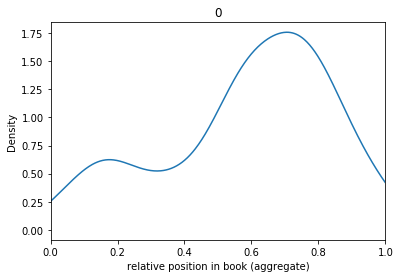

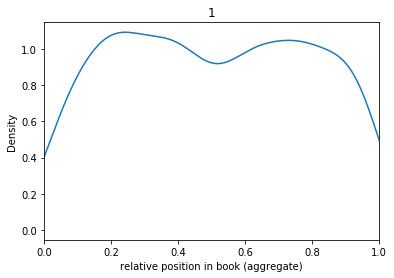

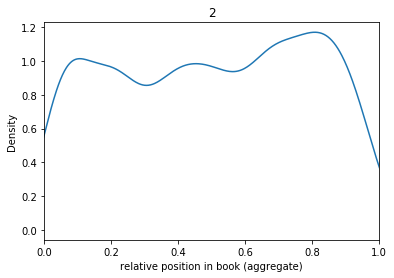

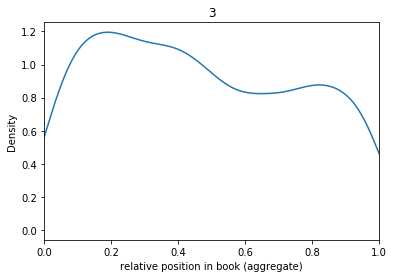

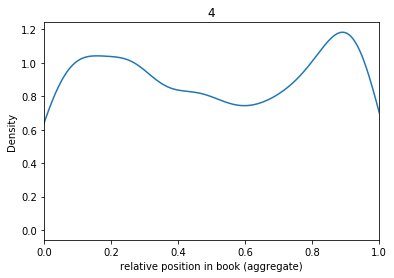

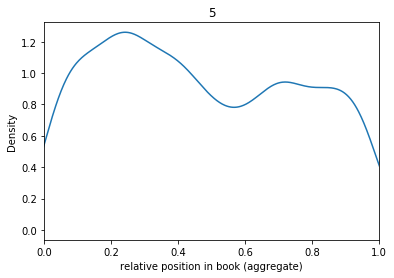

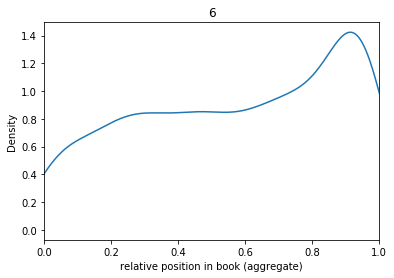

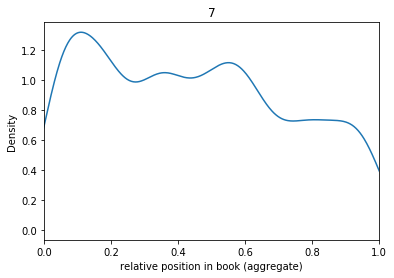

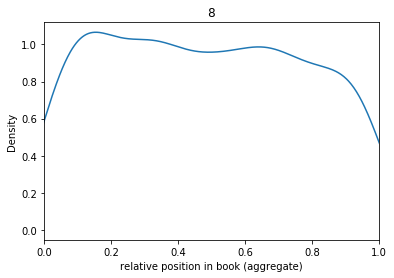

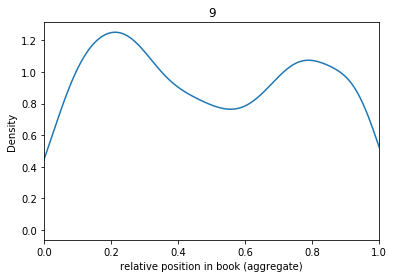

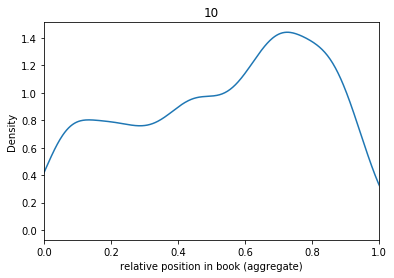

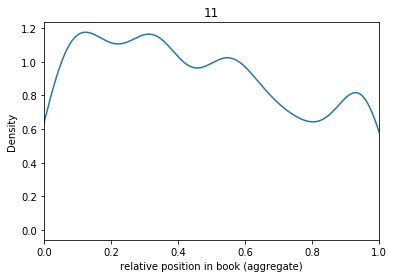

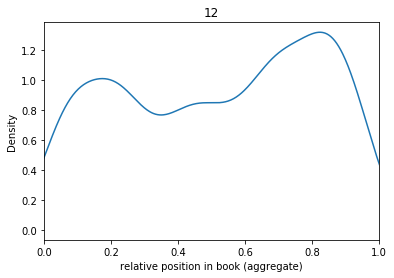

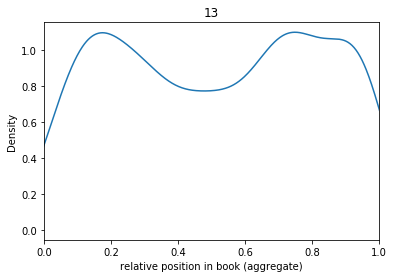

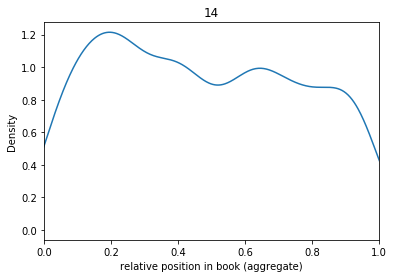

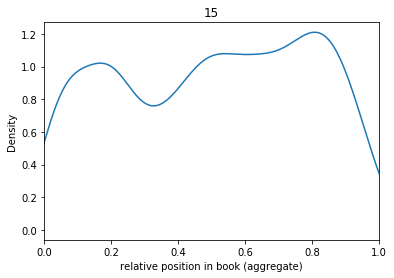

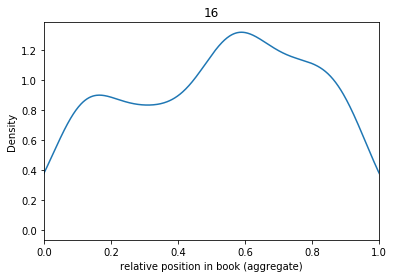

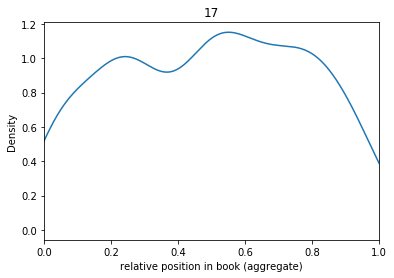

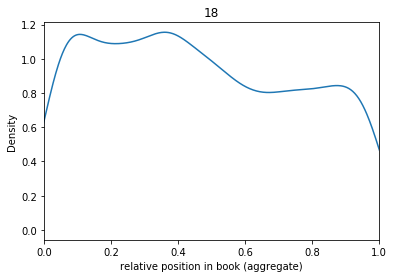

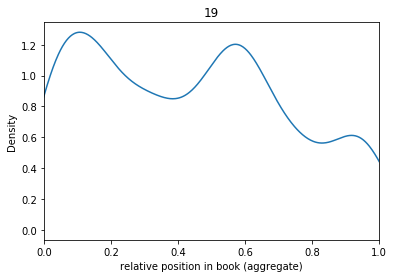

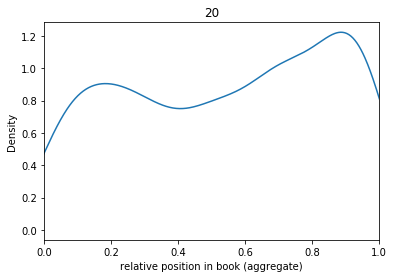

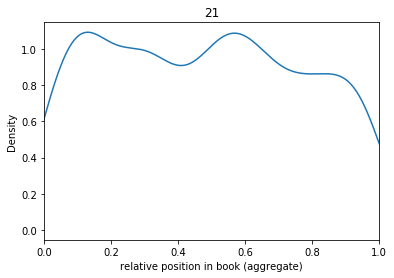

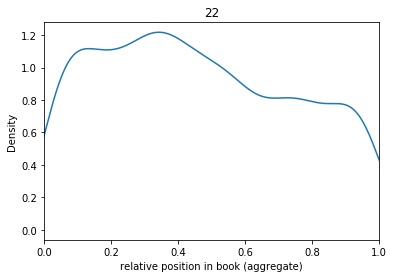

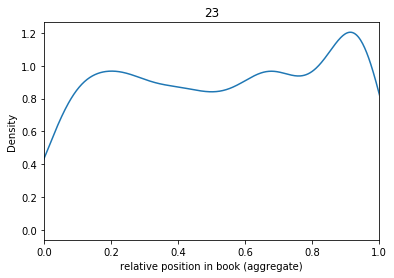

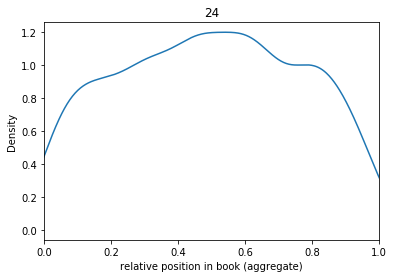

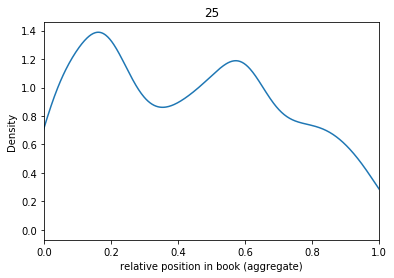

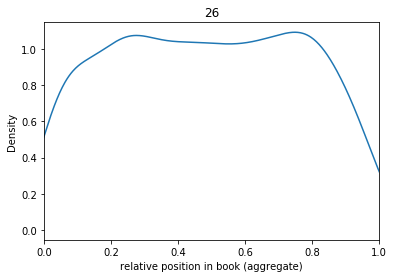

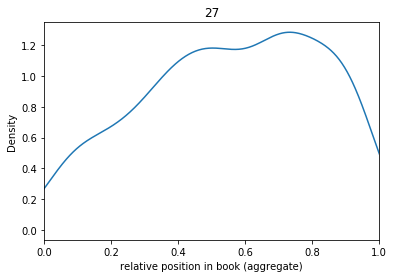

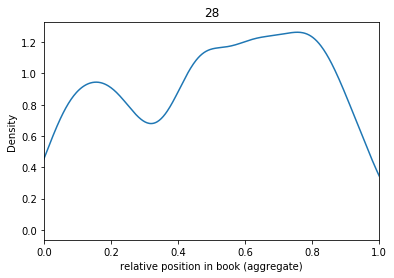

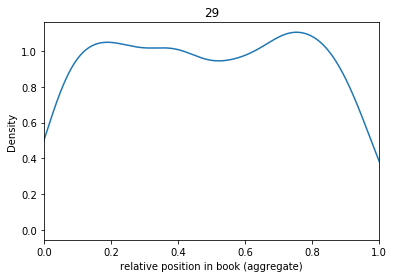

In [26]:
outpath = 'hathi_kmeans_clusters_thru_book/'

# plot density of all 30 clusters vs relative position in book (aggregate)
# track peaks and troughs of each cluster

for x in range(30):
    y = df.loc[df['cluster'] == x]['rel_pos']
    plt.figure()
    plt.xlim(0,1)
    plt.xlabel('relative position in book (aggregate)')
    plt.title(x)
    #y.plot.hist(bins = 100)
    y.plot.kde()
    #plt.savefig(outpath +'cluster_{}_across_book'.format(x))

    


In [ ]:
# add decade column
def getDecade(year):
    return year[:-1] + '0'
df['decade'] = df['date'].astype('category')
df['decade'] = df['decade'].apply(getDecade)
df


In [ ]:
outpath = 'hathi_kmeans_clusters_thru_time/'

# plot histogram of clusters across publication dates

datetime = pd.DatetimeIndex([str(x) for x in df.date]) #convert year to datetime objects
df['date'] = datetime

for x in range(30):
    y = df.loc[df['cluster'] == x]['date']
    plt.figure()
    plt.title('Frequency of cluster ' + str(x) +' across time')
    y.hist(bins = 20)
    #plt.savefig(outpath +'cluster_{}_across_time'.format(x))


In [ ]:
f = 'hathi_kmeans_clusters_thru_time_segments/'
def saveSegmentDataToCSV(outfolder):
    for i in range(30):
        outf = 'cluster_' + str(i) + '_dataframe.csv'
        cluster_frame = df[df['cluster'] == i]
        cluster_frame.to_csv(outfolder + outf)


In [ ]:
df[df['cluster'] == 28]['text'].sample(40)

In [ ]:
#for x in unique_codes:
    #df[df['hathi_id'] == x]
book_props = df.groupby(['hathi_id', 'cluster']).agg({'rel_pos': 'sum'})
# Change: groupby state_office and divide by sum
x = book_props.groupby('hathi_id').apply(lambda x:100 * x / float(x.sum()))
for i in unique_codes:
    y = df[df['hathi_id'] == i]['cluster']
    y.plot.pie()

#df.groupby(['hathi_id','cluster']).agg('count')


In [28]:
gr = df.groupby(['hathi_id', 'cluster']).size()
gr.groupby(level=0).sum()
gr = gr / gr.groupby(level=0).sum()
gr['hathi_id']

KeyError: 'hathi_id'